<a href="https://colab.research.google.com/github/vroomgit/LLM-classification/blob/main/llm_finetune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fine tuning microsoft/DeBerta model on stanfordsst-2 dataset (Hugging Face).


In [ ]:
!pip install --upgrade pip --quiet
!pip install -U transformers --quiet
#!pip install --no-cache-dir transformers==4.40.1
!pip install -U sentencepiece --quiet
!pip install -U datasets --quiet
!pip install -U matplotlib --quiet
!pip install -U ipywidgets --quiet
!pip install -U accelerate --quiet
!pip install -U umap-learn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/

In [ ]:
import pip, transformers, datasets, matplotlib, ipywidgets, sentencepiece, accelerate, umap
print("Pip version: ", pip.__version__)
print("Transformers version: ",transformers.__version__)
print("Datasets version: ",datasets.__version__)
print("Matplotlib version: ",matplotlib.__version__)
print("ipywidgets version: ",ipywidgets.__version__)
print("sentencepiece version: ",sentencepiece.__version__)
print("accelerate version: ",accelerate.__version__)
print("umap version: ",umap.__version__)

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Pip version:  24.0
Transformers version:  4.41.1
Datasets version:  2.19.1
Matplotlib version:  3.7.1
ipywidgets version:  8.1.2
sentencepiece version:  0.2.0
accelerate version:  0.30.1
umap version:  0.5.6


In [ ]:
"""
Pip version:  24.0
Transformers version:  4.40.1
Datasets version:  2.19.0
Matplotlib version:  3.7.1
ipywidgets version:  7.7.1
sentencepiece version:  0.1.99
accelerate version:  0.30.1
umap version:  0.5.6
"""

## The Dataset

References

[1]	R. Socher et al., ‘Recursive Deep Models for Semantic Compositionality Over a Sentiment Treebank’, in Proceedings of the 2013 Conference on Empirical Methods in Natural Language Processing, 2013, pp. 1631–1642.

In [ ]:
# hide_output
from datasets import load_dataset

sst = load_dataset("stanfordnlp/sst2", download_mode="force_redownload", trust_remote_code=True)

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Taking a look at the structure of DatasetDict

In [ ]:
sst

DatasetDict({
    train: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 872
    })
    test: Dataset({
        features: ['idx', 'sentence', 'label'],
        num_rows: 1821
    })
})

In [ ]:
train_ds = sst["train"]
train_ds

Dataset({
    features: ['idx', 'sentence', 'label'],
    num_rows: 67349
})

In [ ]:
sst['train'][:5]

{'idx': [0, 1, 2, 3, 4],
 'sentence': ['hide new secretions from the parental units ',
  'contains no wit , only labored gags ',
  'that loves its characters and communicates something rather beautiful about human nature ',
  'remains utterly satisfied to remain the same throughout ',
  'on the worst revenge-of-the-nerds clichés the filmmakers could dredge up '],
 'label': [0, 0, 1, 0, 0]}

In [ ]:
train_ds.column_names

['idx', 'sentence', 'label']

In [ ]:
pprint(train_ds.features)

{'idx': Value(dtype='int32', id=None),
 'label': ClassLabel(names=['negative', 'positive'], id=None),
 'sentence': Value(dtype='string', id=None)}


### Visualizing class distribution of dataset

In [ ]:
import pandas as pd

sst.set_format(type="pandas") # this is later reset after visualizations
df = sst["train"][:]
df.head()

,idx,sentence,label
0,0,hide new secretions from the parental units,0
1,1,"contains no wit , only labored gags",0
2,2,that loves its characters and communicates som...,1
3,3,remains utterly satisfied to remain the same t...,0
4,4,on the worst revenge-of-the-nerds clichés the ...,0


Creating label_name column to store label name for plotting

In [ ]:
def label_int2str(row):
    return sst["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
#df.head()

### Plotting Class Distribution

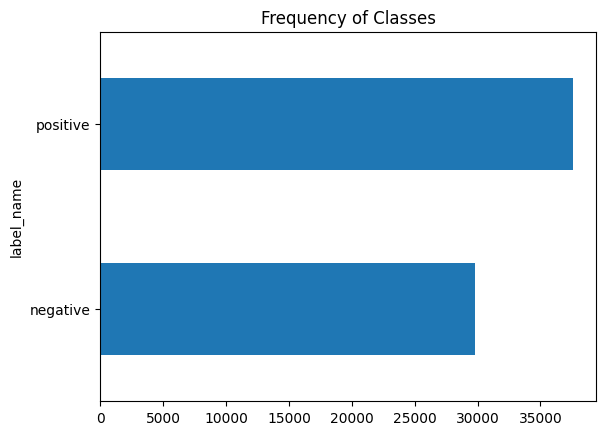

In [ ]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh() # changed label_name to label_text
plt.title("Frequency of Classes")
plt.show()

### Looking at the length of sentences in dataset within the two classes.

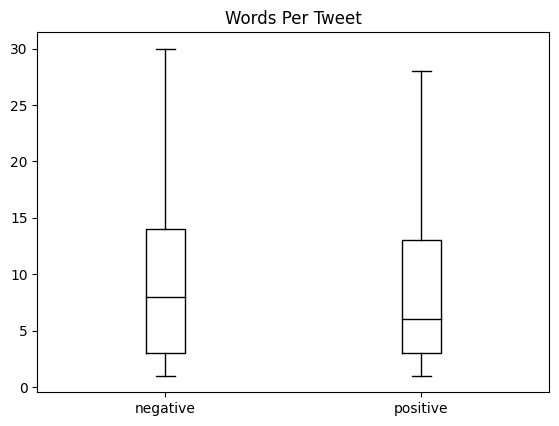

In [ ]:
df["Words Per Tweet"] = df["sentence"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [ ]:
pprint(sst.column_names)

{'test': ['idx', 'sentence', 'label'],
 'train': ['idx', 'sentence', 'label'],
 'validation': ['idx', 'sentence', 'label']}


In [ ]:
# IMPORTANT TO RUN IF VISUALIZED EARLIER USING PANDAS
sst.reset_format()

In [ ]:
type(sst)

datasets.dataset_dict.DatasetDict

### Tokenizing the dataset

In [ ]:
# hide_output
from transformers import AutoTokenizer

model_ckpt = "microsoft/deberta-v3-base"
#tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
tokenizer = AutoTokenizer.from_pretrained(model_ckpt, use_fast=False)

tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/579 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

In [ ]:
tokenizer.vocab_size

128000

and the corresponding model's maximum context size:

In [ ]:
# No model max length in current version of model. So it is defaulting to a large int in the cell above. Setting manually based on book
if tokenizer.model_max_length > 1e6:
  tokenizer.model_max_length = 128


In [ ]:
tokenizer.model_input_names

['input_ids', 'token_type_ids', 'attention_mask']

In [ ]:
# padding=True will pad the examples with zeros to the size of the longest one in a batch,
# and truncation=True will truncate the examples to the model's maximum context size

def tokenize(batch):
    return tokenizer(batch["sentence"], padding=True, truncation=True)

In [ ]:
print(tokenize(sst['train'][:5]))

{'input_ids': [[1, 5021, 353, 69422, 292, 262, 14019, 2339, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 2047, 363, 14171, 366, 364, 45930, 65188, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 272, 3721, 359, 1855, 263, 28736, 491, 899, 874, 314, 857, 1417, 2, 0, 0, 0, 0, 0], [1, 2004, 11194, 4622, 264, 1809, 262, 454, 1075, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 277, 262, 3130, 12536, 271, 1580, 271, 724, 271, 80539, 268, 58443, 262, 17238, 387, 52552, 322, 2]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 

In [ ]:
# checking lengths of tokens in tokenized batch
tokenized_example = tokenize(sst['train'][145:150])
for i in tokenized_example['input_ids']:
  print(len(i))

24
24
24
24
24


In [ ]:
""" Looking at special tokens in tokenizer """

#hide_input
tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
data = sorted(tokens2ids, key=lambda x : x[-1])
df = pd.DataFrame(data, columns=["Special Token", "Special Token ID"])
df.T

,0,1,2,3,4
Special Token,[PAD],[CLS],[SEP],[UNK],[MASK]
Special Token ID,0,1,2,3,128000


In [ ]:
#tokenized_datasets = emotions.map(tokenizer(replace_lambda(emotions)), batched=True)
sst_encoded = sst.map(lambda data: tokenizer(data['sentence'], padding=True, truncation=True), batched=True, batch_size=None)

# batch size is kept none so all sentences are the same length because the tokenizer pads all sentences to make it equal to longest sentence.
# can be potentially batched if length of longest sentence is known. Batched is faster as per docs

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Looking at the max length of tokens (or sentences). All sentences are padded to this length

In [ ]:
len(sst_encoded['train']['input_ids'][2])


62

In [ ]:
print(sst_encoded["train"].column_names)

['idx', 'sentence', 'label', 'input_ids', 'token_type_ids', 'attention_mask']


## Training a Text Classifier using finetuning

In [ ]:
# hide_output
import torch
from transformers import AutoModel

model_ckpt = "microsoft/deberta-v3-base"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [ ]:
# hide_output
from transformers import AutoModelForSequenceClassification

num_labels = 2
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### Defining the performance metrics

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

#### Training the model

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 128
logging_steps = len(sst_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-sst2"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=3,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

In [ ]:

from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=sst_encoded["train"],
                  eval_dataset=sst_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.192900,0.152343,0.954128,0.954117
2,0.104200,0.150274,0.954128,0.954103
3,0.078600,0.148360,0.959862,0.959857


In [ ]:
import numpy as np

X_train = np.array(sst_encoded["train"])
X_valid = np.array(sst_encoded["validation"])
y_train = np.array(sst_encoded["train"]["label"])
y_valid = np.array(sst_encoded["validation"]["label"])
X_train.shape, X_valid.shape
y_test = np.array(sst_encoded["test"]["label"])

In [ ]:
# Loading previously trained model
from transformers import AutoModelForSequenceClassification
full_model_name = "vroomhf/deberta-v3-base-finetuned-sst2"
model = AutoModelForSequenceClassification.from_pretrained(full_model_name)


In [ ]:
# if making predictions from downloaded model.
import torch
from transformers import Trainer
trainer = Trainer(model=model)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
preds_output = trainer.predict(X_valid)

In [ ]:
import numpy as np
y_preds = np.argmax(preds_output.predictions, axis=1)

In [ ]:
labels = sst["train"].features["label"].names


In [ ]:
y_preds.shape

(872,)

In [ ]:
from matplotlib import pyplot as plt

With the predictions, we can plot the confusion matrix:

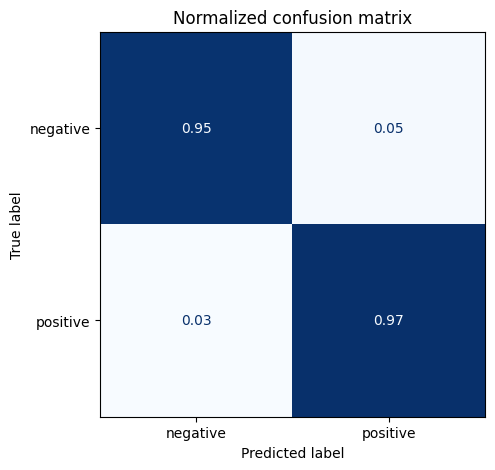

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(5, 5))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()
plot_confusion_matrix(y_preds, y_valid, labels)

#### Error analysis

In [ ]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")

    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

Using the `map()` method once more, we can apply this function to get the losses for all the samples:

In [ ]:
#hide_output
# Convert our dataset back to PyTorch tensors
sst_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values
sst_encoded["validation"] = sst_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=32)

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

In [ ]:
sst_encoded["validation"].column_names

['idx',
 'sentence',
 'label',
 'input_ids',
 'token_type_ids',
 'attention_mask',
 'loss',
 'predicted_label']

Finally, we create a `DataFrame` with the texts, losses, and predicted/true labels:

In [ ]:
sst_encoded.set_format("pandas")
#cols = ["sentence", "label", "predicted_label", "loss"]
cols = ["sentence", "label","predicted_label", "loss"]
df_test = sst_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

In [ ]:
#hide_output
df_test.sort_values("loss", ascending=False).head(10)

,sentence,label,predicted_label,loss
95,this riveting world war ii moral suspense stor...,negative,positive,7.911362
183,"the lower your expectations , the more you 'll...",negative,positive,6.518661
519,moretti 's compelling anatomy of grief and the...,negative,positive,6.404187
699,"... routine , harmless diversion and little el...",positive,negative,5.064606
791,it 's somewhat clumsy and too lethargically pa...,negative,positive,4.997479
271,as unseemly as its title suggests .,positive,negative,4.907634
93,if steven soderbergh 's ` solaris ' is a failu...,positive,negative,4.869948
685,no screen fantasy-adventure in recent memory h...,positive,negative,4.803792
282,while there 's something intrinsically funny a...,positive,negative,4.786397
501,harrison 's flowers puts its heart in the righ...,positive,negative,4.344114


In [ ]:
#hide_output
df_test.sort_values("loss", ascending=True).head(10)

,sentence,label,predicted_label,loss
275,"an entertaining , colorful , action-filled cri...",positive,positive,0.000119
311,"a warm , funny , engaging film .",positive,positive,0.000120
32,"a gorgeous , witty , seductive movie .",positive,positive,0.000121
67,"a fast , funny , highly enjoyable movie .",positive,positive,0.000126
769,an infectious cultural fable with a tasty bala...,positive,positive,0.000127
569,"one of those energetic surprises , an original...",positive,positive,0.000129
658,"a smart , witty follow-up .",positive,positive,0.000129
430,a breezy romantic comedy that has the punch of...,positive,positive,0.000129
129,"it provides the grand , intelligent entertainm...",positive,positive,0.000130
479,it 's a stunning lyrical work of considerable ...,positive,positive,0.000134


In [ ]:
#hide_output
trainer.push_to_hub(commit_message="Training completed!")

model.safetensors:   0%|          | 0.00/738M [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

events.out.tfevents.1716308506.b3127c771701.1675.0:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/vroomhf/deberta-v3-base-finetuned-sst2/commit/297a5dfce6be14d776bd06e98e2b98ab3326c627', commit_message='Training completed!', commit_description='', oid='297a5dfce6be14d776bd06e98e2b98ab3326c627', pr_url=None, pr_revision=None, pr_num=None)

References:
1. L. Tunstall, L. von Werra, and T. Wolf, Natural Language Processing with Transformers: Building Language Applications with Hugging Face. O’Reilly Media, Incorporated, 2022.